## Code for plotting SERF-TAR simulation contact frequencies per residue of SERF 
This script reads in several text files (one for each TAR conformation analyzed) containing per-residue contact frequencies for TAR on SERF. Contact frequencies were calculated from SERF-TAR simulations using the same workflow as employed in 'frame+contact_finder.ipynb'.


In [3]:
## import packages ##

import os
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from glob import glob


In [13]:
## load per-residue contact frequencies of TAR on SERF for each accepted TAR conformer simulation
# append all datasets so we can get an average across conformers

files = glob('SERF_contact_data+TAR/*_contacts.txt')

mutants = []
data = []

for file in files:
    fname = os.path.splitext(file)[0]
    mutname = fname.split('_contacts')[0]
    mutants.append(mutname)
    data.append(np.loadtxt(file))
    
# also load the NMR CSPs from experiments of SERF with added TAR 
# [:,0] == residue
# [:,1] == chemical shift perturbation
nmr_data = np.loadtxt('SERF_contact_data+TAR/CSP_SERFaddTAR.txt')

In [6]:
## organize and average to make plotting easier ##

df = pd.DataFrame(data).transpose()

df.columns = mutants

avg_contacts = df.mean(axis = 1)
std_contacts = df.sem(axis = 1)

residues = np.arange(1, 69, 1)

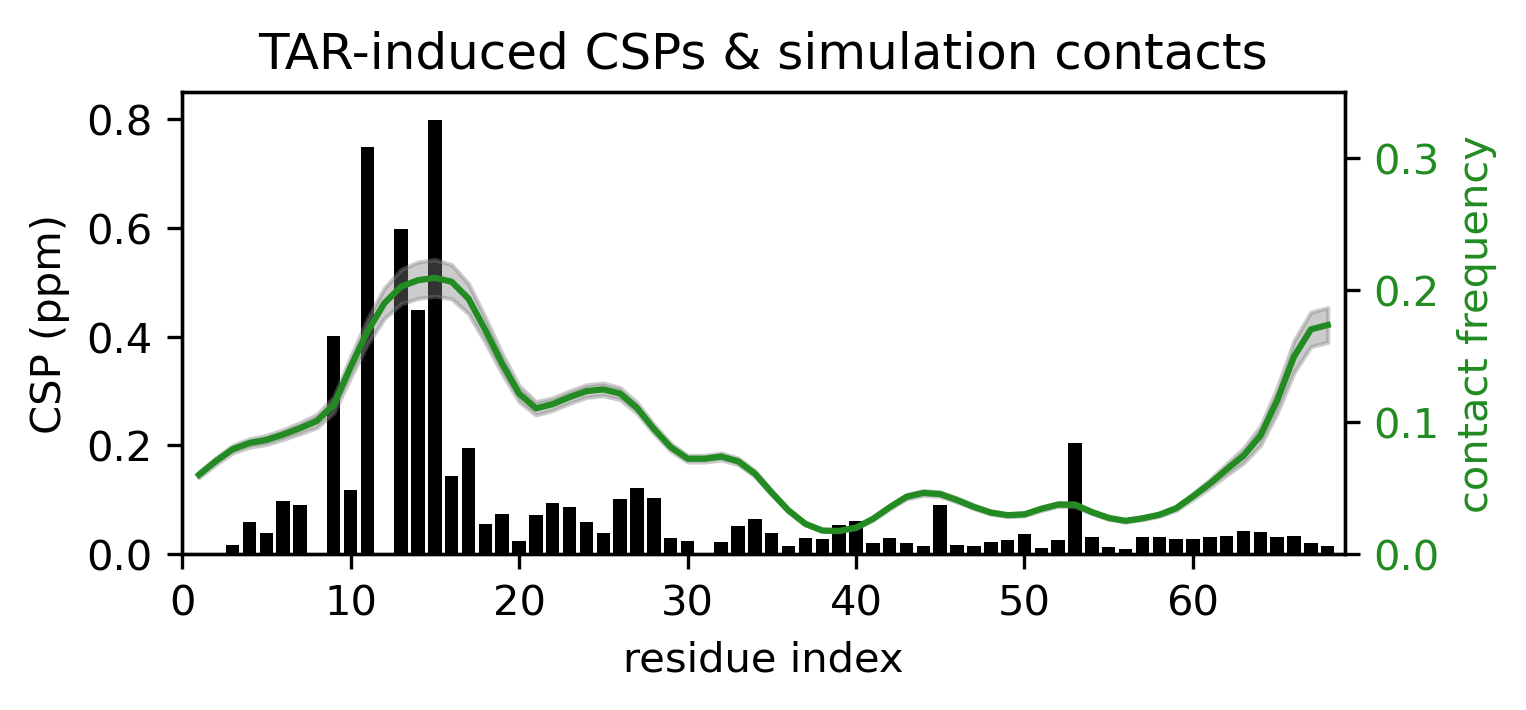

In [11]:
## plot CSPs as bars and contact frequencies from simulations as line -- generates Figure 4C

fig, ax1 = plt.subplots(figsize = (5, 2), dpi = 300, facecolor = 'w', edgecolor = 'k')
ax2 = ax1.twinx()

# plot SERF CSPs with added TAR (left axis)
ax1.bar(nmr_data[:,0], nmr_data[:,1], color = 'black')

# plot SERF contact frequencies from CG simulations with TAR (right axis)
ax2.plot(residues, avg_contacts, color = 'forestgreen')
ax2.fill_between(residues, avg_contacts-std_contacts, avg_contacts+std_contacts, color = 'grey', alpha = 0.4)

plt.xlim([0, 69])

ax1.set_ylim([0, 0.85])
ax2.set_ylim([0, 0.35])

ax1.set_xlabel('residue index')
plt.title('TAR-induced CSPs & simulation contacts')
ax1.set_ylabel('CSP (ppm)', color = 'black')
ax1.tick_params(axis='y', labelcolor = 'black')

ax2.set_ylabel('contact frequency', color = 'forestgreen')
ax2.tick_params(axis='y', labelcolor = 'forestgreen')

## UNCOMMENT below to save figure as PDF
#plt.savefig('Figure4C_SERF-TAR_CSPs+contacts.pdf', format = 'pdf', dpi = 300)
plt.show()